# Проектная работа: анализ бизнес показателей.

## Описание проектной работы.

Последние несколько месяцев компания развлекательного приложения Procrastinate Pro+ терпит убытки, несмотря на огромные вложения в рекламу. Необходимо разобраться в причинах и помочь компании выйти в плюс.

В распоряжение есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Требуется изучить:**
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.


## Описание данных.

- Файл **visits_info_short.csv** хранит лог сервера с информацией о посещениях сайта, 
- Файл **orders_info_short.csv** — информация о заказах, 
- Файл **costs_info_short.csv** — информация о расходах на рекламу.

**Структура visits_info_short.csv:**
- *User Id* — уникальный идентификатор пользователя,
- *Region* — страна пользователя,
- *Device* — тип устройства пользователя,
- *Channel* — идентификатор источника перехода,
- *Session Start* — дата и время начала сессии,
- *Session End* — дата и время окончания сессии.

**Структура orders_info_short.csv:**
- *User Id* — уникальный идентификатор пользователя,
- *Event Dt* — дата и время покупки,
- *Revenue* — сумма заказа.

**Структура costs_info_short.csv:**
- *dt* — дата проведения рекламной кампании,
- *Channel* — идентификатор рекламного источника,
- *costs* — расходы на эту кампанию.

## Загрузка и подготовка данных к анализу.

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Подготовка данных:**
- Изучить данные и выполните предобработку.
- Выполнить предобработку данных по пропускам и дубликатам? 
- Убедиться, что типы данных во всех колонках соответствуют сохранённым в них значениям. 
- Обратить внимание на столбцы с датой и временем.

### Загрузка данных.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as mdates # работа с датами
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None) #команда для отображения всех столбцов датафрейма
pd.set_option('display.max_rows', None) #команда для отображения всех строк датафрейма
pd.set_option('display.float_format', lambda x: '%.3f' % x) #перевод данных из экспоненциальной нотации в обычную

In [3]:
# загрузка данных
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'),  # покупки
    pd.read_csv('/datasets/costs_info_short.csv'),  # траты на рекламу
)

### Изучение данных.

#### Файл visits_info_short.csv

Файл visits_info_short.csv , хранящий логи сервера с информацией о посещениях сайта сохранила в переменную visits.

In [4]:
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
# нахожу пропуски
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [7]:
#нахожу полные дубликаты в данных всего датафрейма
display('Полные дубликаты:', visits.duplicated(keep=False).sum())

'Полные дубликаты:'

0

Изучив первичную информацию по датафрейму visits, можно сделать следующие выводы:
- требуется приведение названий столбцов к единообразному виду;
- требуется замена типов данных с object в столбцах с датой и временем Session Start, Session End, для дальнейшей корректной работы с ними;
- обработка пропусков и дубликатов не требуется, т.к. их нет.

#### Файл orders_info_short.csv

Файл orders_info_short.csv — информация о заказах, сохранила в переменную orders.

In [8]:
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.990
1,174361394180,2019-05-01 12:24:04,4.990
2,529610067795,2019-05-01 11:34:04,4.990
3,319939546352,2019-05-01 15:34:40,4.990
4,366000285810,2019-05-01 13:59:51,4.990


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [10]:
# нахожу пропуски
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [11]:
#нахожу полные дубликаты в данных всего датафрейма
display('Полные дубликаты:', orders.duplicated(keep=False).sum())

'Полные дубликаты:'

0

Изучив первичную информацию по датафрейму orders, можно сделать следующие выводы:
- требуется приведение названий столбцов к единообразному виду;
- требуется замена типов данных с object в столбце с датой и временем Event Dt, для дальнейшей корректной работы с ним;
- обработка пропусков и дубликатов не требуется, т.к. их нет.

#### Файл costs_info_short.csv

Файл **costs_info_short.csv** — информация о расходах на рекламу, срхранила в переменную costs.

In [12]:
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.300
1,2019-05-02,FaceBoom,78.100
2,2019-05-03,FaceBoom,85.800
3,2019-05-04,FaceBoom,136.400
4,2019-05-05,FaceBoom,122.100


In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [14]:
# нахожу пропуски
costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [15]:
#нахожу полные дубликаты в данных всего датафрейма
display('Полные дубликаты:', costs.duplicated(keep=False).sum())

'Полные дубликаты:'

0

Изучив первичную информацию по датафрейму orders, можно сделать следующие выводы:
- требуется приведение названия столбца Channel к единообразному виду;
- в столбце с датой и временем dt требуется выделить дату, для дальнейшей корректной работы с ним;
- обработка пропусков и дубликатов не требуется, т.к. их нет.

#### Общий вывод по изучению данных:

Во всех датафреймах требуется выполнить следующую предобработку:
- приведение названий столбцов к единообразному виду;
- выполнить преобразование данных в столбцах с датой и временем, для дальнейшей корректной работы с ними.

Т.к. пропусков и полных дубликатов нет, то их обработка не требуется.

### Предобработка данных.

**Изменение названий столбцов:**

In [16]:
# переименование столбцов датафрейма visits
visits.rename(columns={
    'User Id': 'user_id',
    'Region': 'region',
    'Device': 'device',
    'Channel': 'channel',
    'Session Start': 'session_start',
    'Session End': 'session_end'
}, inplace=True)

# переименование столбцов датафрейма orders
orders.rename(columns={
    'User Id': 'user_id',
    'Event Dt': 'event_dt',
    'Revenue': 'revenue'
}, inplace=True)

# переименование столбцов датафрейма costs
costs.rename(columns={'Channel': 'channel'}, inplace=True)

**Преобразование данных о времени:**

In [17]:
# преобразование данных о времени
visits[['session_start', 'session_end']] = visits[['session_start', 'session_end']].apply(pd.to_datetime) # журнал сессий
orders['event_dt'] = pd.to_datetime(orders['event_dt']) # покупки
costs['dt'] = pd.to_datetime(costs['dt']).dt.date  # траты на рекламу

**Проверка проведенных преобразований:**

In [18]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [20]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


### Вывод по загрузке и подготовке данных.

**На этом этапе были выполнены следующие действия:**

*1. Загружены и изучены файлы:*
- Файл **visits_info_short.csv** хранит лог сервера с информацией о посещениях сайта - переменная **visits**. 
- Файл **orders_info_short.csv** — информация о заказах - переменная **orders**.
- Файл **costs_info_short.csv** — информация о расходах на рекламу - переменная **costs**.

*2. Проведена предобработка данных:*
- переименованы столбцы датафреймов (приведены к единообразному виду);
- выполнено преобразование данных в столбцах с датой и временем;
- изучены пропуски и дубликаты, т.к. таковых нет, то их обработка не требуется.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функции для создания профилей, расчёта удержания, конверсии, LTV и ROI

In [21]:
# Функция для создания профилей пользователей

def get_profiles(sessions, orders, ad_costs):

    # Находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # Определяем дату и месяц первого посещения для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # Добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # Считаем количество уникальных пользователей
    # с одинаковым источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # Объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # Заполняем NaN в 'unique_users' значением 0, чтобы избежать ошибок деления
    ad_costs['unique_users'] = ad_costs['unique_users'].fillna(0)

    # Рассчитываем стоимость привлечения на одного пользователя
    # Заменяем 0 в 'unique_users' на NaN, чтобы избежать деления на 0
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users'].replace({0: np.nan})

    # Добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # Заполняем стоимость привлечения для органических пользователей как 0
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [22]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [23]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [24]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
  
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функции визуализаций метрик

In [25]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [26]:
# функция для визуализации конверси

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [27]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [28]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Итоги загрузки функций:
На этом этапе были загружены функции для дальнейшего изучения информации.

Функции для вычисления значений метрик:
- get_profiles() — для создания профилей пользователей,
- get_retention() — для подсчёта Retention Rate,
- get_conversion() — для подсчёта конверсии,
- get_ltv() — для подсчёта LTV.

Функции для построения графиков:
- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Профили пользователей.

In [29]:
# получаю профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.231
5,34186288,2019-05-09 17:29:23,organic,Android,United States,2019-05-09,2019-05-01,False,0.000
6,38448301,2019-08-16 11:56:00,organic,Android,United States,2019-08-16,2019-08-01,False,0.000
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250


In [30]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


In [31]:
# Определяю минимальную и максимальную даты привлечения пользователей
min_date_attraction = profiles['first_ts'].min()
max_date_attraction = profiles['first_ts'].max()

# Вывод результатов
display('Минимальная дата привлечения пользователей:', min_date_attraction)
display('Максимальная дата привлечения пользователей:', max_date_attraction)

'Минимальная дата привлечения пользователей:'

Timestamp('2019-05-01 00:00:41')

'Максимальная дата привлечения пользователей:'

Timestamp('2019-10-27 23:59:04')

**Вывод:**

1. Для вывода профилей пользователей вызвала функцию get_profiles(), передав ей данные о посещениях (visits), покупках (orders), тратах на рекламу (costs). Данные сохранила в переменную *profiles*.
2. *profiles* содержит следующю информацию:
- user_id - уникальный идентификатор пользователя,
- first_ts - дата и время первой активности пользователя в приложении,
- channel— идентификатор рекламного источника/ источника перехода,
- device — тип устройства пользователя,
- region — страна пользователя,
- dt - дата проведения рекламной кампании,
- month - месяц, в котором был привлечён пользовател,
- payer -  информация о том, является ли пользователь платящим (булевое значение, где True - платящий пользователя, а False — на неплатящий),
- acquisition_cost - данные о стоимости привлечения (CAC) для каждого пользователя.
3. Определила минимальную и максимальную даты привлечения пользователей:
- минимальная - '2019-05-01 00:00:41',
- максимальная - '2019-10-27 23:59:04'.
Даты совпадают с указанным периодом для анализа.

### Пользователи по странам.

In [32]:
# Выведу уникальные значения столбца region - страна пользователя
display('Страны пользователей:', profiles['region'].unique().tolist())

'Страны пользователей:'

['United States', 'France', 'Germany', 'UK']

In [33]:
# Группирую данные по стране
# Информацию сохраню в переменную country_summary
country_summary = profiles.groupby('region').agg(
    total_users=('user_id', 'nunique'),  # Подсчет количества уникальных пользователей
    paying_users=('payer', 'sum')        # Подсчет количества платящих пользователей
).reset_index()

# Вычислю долю платящих пользователей
country_summary['paying_share'] = country_summary['paying_users'] / country_summary['total_users']

# Вывод таблицы
display(
    country_summary.sort_values(by='paying_share', ascending=False) # Сортировка по убыванию
    .reset_index(drop=True)
    .rename(columns={'region': 'страна',
                     'total_users': 'кол-во пользователей',
                     'paying_users':'кол-во платящих',
                     'paying_share':'доля платящих'}) # переименование столбцов
)

,страна,кол-во пользователей,кол-во платящих,доля платящих
0,United States,100002,6902,0.069
1,Germany,14981,616,0.041
2,UK,17575,700,0.040
3,France,17450,663,0.038


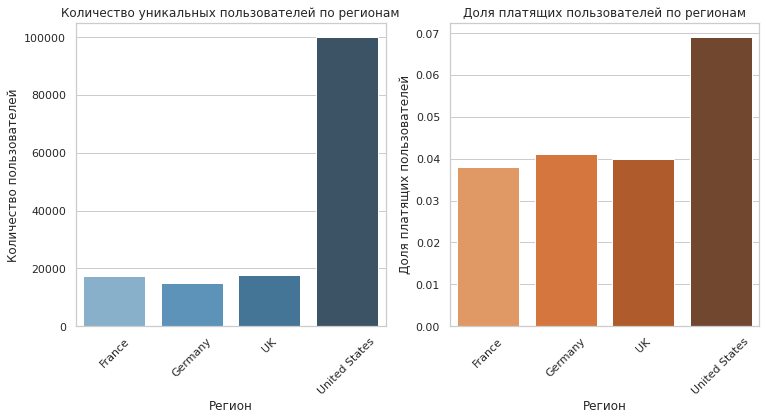

In [34]:
# стиль графиков
sns.set(style="whitegrid")

# размер графиков
plt.figure(figsize=(16, 6))

# График 1: Количество уникальных пользователей по регионам
plt.subplot(1, 3, 1)
sns.barplot(data=country_summary, x='region', y='total_users', palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Количество уникальных пользователей по регионам')
plt.ylabel('Количество пользователей')
plt.xlabel('Регион')

# График 2: Доля платящих пользователей по регионам
plt.subplot(1, 3, 2)
sns.barplot(data=country_summary, x='region', y='paying_share', palette='Oranges_d')
plt.xticks(rotation=45)
plt.title('Доля платящих пользователей по регионам')
plt.ylabel('Доля платящих пользователей')
plt.xlabel('Регион')

# Подгоняю расположение графиков
plt.tight_layout()
plt.show()

**Вывод:**

Для построения таблицы **country_summary**, отражающей количество пользователей и долю платящих для каждой страны, выполнила следующие шаги:
- сгруппировала пользователей по странам.
- посчитала общее количество пользователей для каждой страны - столбец total_users.
- подсчитала количество платящих пользователей - столбец paying_users. payer - индикатор платящего пользователя (True для платящих и False для остальных), суммируется количество платящих пользователей (т. к. True трактуется как 1).
- вычислила долю платящих пользователей для каждой страны - столбец paying_share. Доля рассчитанна, как отношение платящих к общему количеству.

Из выведенной информации можно сделать следующие выводы:
1. Пользователи приложения, в анализируемых данных, находятся в странах: США (United States), Франция (France), Германия (Germany) и Великобритания(UK).
2. Наибольшее количество пользователей из США (100 002), на вторм месте Великобритания (17 575 - это на 82% меньше, чем с США), а далее, с небольшим отрывом от Великобритания, идут Франция и Германия.
3. Доля платящих пользователей с США самая высокая - 6,9%, далее идет Германия - 4,1%, Великобритания - 4%, Франция - 3,8%.

### Пользователи по типу устройства.

In [35]:
# Выведу уникальные значения столбца device - тип устройства
display('Список устройств пользователей:', profiles['device'].unique().tolist())

'Список устройств пользователей:'

['Mac', 'iPhone', 'PC', 'Android']

In [36]:
# Группирую данные по типу устройства
# Информацию сохраню в переменную device_summary.
device_summary = profiles.groupby('device').agg(
    total_users=('user_id', 'nunique'),  # Подсчет количества уникальных пользователей
    paying_users=('payer', 'sum')        # Подсчет количества платящих пользователей
).reset_index()

# Вычисляю долю платящих пользователей и сохраняю в столбец paying_share
device_summary['paying_share'] = device_summary['paying_users'] / device_summary['total_users']

# вывод таблицы
display(
    device_summary.sort_values(by='paying_share', ascending=False) # Сортировка по убыванию
    .reset_index(drop=True)
    .rename(columns={'device': 'тип устройства',
                     'total_users': 'кол-во пользователей',
                     'paying_users':'кол-во платящих',
                     'paying_share':'доля платящих'}) # переименование столбцов
)

,тип устройства,кол-во пользователей,кол-во платящих,доля платящих
0,Mac,30042,1912,0.064
1,iPhone,54479,3382,0.062
2,Android,35032,2050,0.059
3,PC,30455,1537,0.050


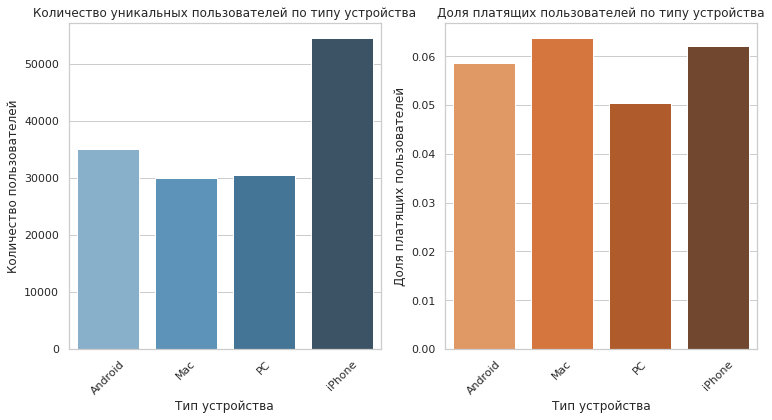

In [37]:
# стиль графиков
sns.set(style="whitegrid")

# размер графиков
plt.figure(figsize=(16, 6))

# График 1: Количество уникальных пользователей по регионам
plt.subplot(1, 3, 1)
sns.barplot(data=device_summary, x='device', y='total_users', palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Количество уникальных пользователей по типу устройства')
plt.ylabel('Количество пользователей')
plt.xlabel('Тип устройства')

# График 2: Доля платящих пользователей по регионам
plt.subplot(1, 3, 2)
sns.barplot(data=device_summary, x='device', y='paying_share', palette='Oranges_d')
plt.xticks(rotation=45)
plt.title('Доля платящих пользователей по типу устройства')
plt.ylabel('Доля платящих пользователей')
plt.xlabel('Тип устройства')

# Подгоняю расположение графиков
plt.tight_layout()
plt.show()

**Вывод:**

Для построения таблицы **device_summary**, отражающей количество пользователей и долю платящих для каждого устройства, выполнила следующие шаги:
- сгруппировала пользователей по устройству.
- посчитала общее количество пользователей для каждого устройства - столбец total_users.
- подсчитала количество платящих пользователей - столбец paying_users. payer - индикатор платящего пользователя (True для платящих и False для остальных), суммируется количество платящих пользователей (т. к. True трактуется как 1).
- вычислила долю платящих пользователей для каждого устройства - столбец paying_share. Доля рассчитанна, как отношение платящих к общему количеству.

Из выведенной информации можно сделать следующие выводы:
1. Пользователи приложения используют устройства: Mac, iPhone', PC, Android.
2. Наибольшее количество пользователей с устройства iPhone (54 479), на вторм месте Android (35 032 - это на 36% меньше, чем с iPhone), и далее идут PC и Mac, т.е. с мобильных устройст пользователей больше, чем с компьютера.
3. Доля платящих пользователей с устройства Mac самая высокая - 6,4%, далее идет iPhone - 6,2%, Android - 5,9%, PC - 5%. 

### Пользователи по рекламным источникам привлечения.

In [38]:
# Выведу уникальные значения столбца device - тип устройства
display('Список рекламных источников:', profiles['channel'].unique().tolist())

'Список рекламных источников:'

['FaceBoom',
 'organic',
 'AdNonSense',
 'YRabbit',
 'MediaTornado',
 'RocketSuperAds',
 'LeapBob',
 'TipTop',
 'WahooNetBanner',
 'OppleCreativeMedia',
 'lambdaMediaAds']

In [39]:
# Группирую данные по рекламным каналам
# Информацию сохраню в переменную channel_summary
channel_summary = profiles.groupby('channel').agg(
    total_users=('user_id', 'nunique'),  # Подсчет количества пользователей
    paying_users=('payer', 'sum')        # Подсчет количества платящих пользователей
).reset_index()

# Вычислю долю платящих пользователей для каждого канала
channel_summary['paying_share'] = channel_summary['paying_users'] / channel_summary['total_users']

# Вывод таблицы
display(
    channel_summary.sort_values(by='paying_share', ascending=False) # Сортировка по убыванию
    .reset_index(drop=True)
    .rename(columns={'channel': 'канал',
                     'total_users': 'кол-во пользователей',
                     'paying_users':'кол-во платящих',
                     'paying_share':'доля платящих'}) # переименование столбцов
)


,канал,кол-во пользователей,кол-во платящих,доля платящих
0,FaceBoom,29144,3557,0.122
1,AdNonSense,3880,440,0.113
2,lambdaMediaAds,2149,225,0.105
3,TipTop,19561,1878,0.096
4,RocketSuperAds,4448,352,0.079
5,WahooNetBanner,8553,453,0.053
6,YRabbit,4312,165,0.038
7,MediaTornado,4364,156,0.036
8,LeapBob,8553,262,0.031
9,OppleCreativeMedia,8605,233,0.027


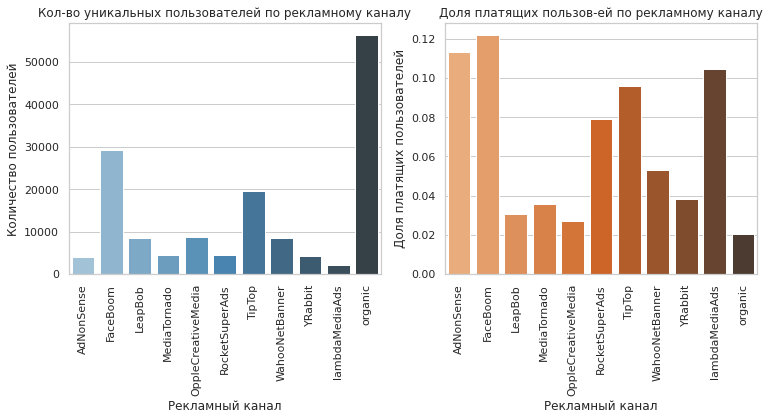

In [40]:
# стиль графиков
sns.set(style="whitegrid")

# размер графиков
plt.figure(figsize=(16, 6))

# График 1: Количество уникальных пользователей по регионам
plt.subplot(1, 3, 1)
sns.barplot(data=channel_summary, x='channel', y='total_users', palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Кол-во уникальных пользователей по рекламному каналу')
plt.ylabel('Количество пользователей')
plt.xlabel('Рекламный канал')

# График 2: Доля платящих пользователей по регионам
plt.subplot(1, 3, 2)
sns.barplot(data=channel_summary, x='channel', y='paying_share', palette='Oranges_d')
plt.xticks(rotation=90)
plt.title('Доля платящих пользов-ей по рекламному каналу')
plt.ylabel('Доля платящих пользователей')
plt.xlabel('Рекламный канал')

# Подгоняю расположение графиков
plt.tight_layout()
plt.show()

**Вывод:**

Для построения таблицы **channel_summary**, отражающей количество пользователей и долю платящих для каждого рекламного источника, выполнила следующие шаги:
- сгруппировала пользователей по рекламному источнику.
- посчитала общее количество пользователей для каждого источника - столбец total_users.
- подсчитала количество платящих пользователей - столбец paying_users. payer - индикатор платящего пользователя (True для платящих и False для остальных), суммируется количество платящих пользователей (т. к. True трактуется как 1).
- вычислила долю платящих пользователей для каждого источника - столбец paying_share. Доля рассчитанна, как отношение платящих к общему количеству.

Из выведенной информации можно сделать следующие выводы:
1. Пользователи приложения пришли со следующих рекламных источников:'FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado', 'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner', 'OppleCreativeMedia', 'lambdaMediaAds'.
2. Наибольшее количество пользователей пришли естественным путем, без рекламных каналов - 'organic' (56 439), на вторм месте FaceBoom (29 144 - это на 48% меньше, чем с organic), и на третьем месте TipTop (19 561)
3. Топ-3 источников с самой высокой долей платящих пользователей (> 10%): FaceBoom (12%), AdNonSense (11%) и lambdaMediaAds (10,5%). Самая низкая доля платящих пользователей, пришедших естественным путем (organic) - 2%.

### Общий вывод по исследовательскому анализу данных.

**В ходе проведенного исследовательского анализа, были выполнены следующие шаги:**
1. Выведенна таблица с профилями пользователей **profiles**.
2. Определены минимальная и максимальная даты привлечения пользователей.
3. Проведен анализ пользователей по странам, данные сохранены в переменну **country_summary**.
4. Проведен анализ пользователей по типу устройства, данные сохранены в переменну **device_summary**.
5. Проведен анализ пользователей по рекламным источникам привлечения, данные сохранены в переменну **channel_summary**.
6. Описаны выводы.

**Итоги:**
1. *Профили пользователей.*

profiles содержит следующю информацию:
- user_id - уникальный идентификатор пользователя,
- first_ts - дата и время первой активности пользователя в приложении,
- channel— идентификатор рекламного источника/ источника перехода,
- device — тип устройства пользователя,
- region — страна пользователя,
- dt - дата проведения рекламной кампании,
- month - месяц, в котором был привлечён пользовател,
- payer -  информация о том, является ли пользователь платящим (булевое значение, где True - платящий пользователя, а False — на неплатящий),
- acquisition_cost - данные о стоимости привлечения (CAC) для каждого пользователя.

2. *Даты привлечения пользователей.*
- минимальная - '2019-05-01 00:00:41',
- максимальная - '2019-10-27 23:59:04'
Совпадают с датами рассматриваемого периода

3. *Информация по странам, типу устройства, рекламным источникам привлечения.*

Список стран пользователей в анализируемых данны:
США (United States), Франция (France), Германия (Germany) и Великобритания(UK).

Список типов устройств в анализируемых данных:
Mac, iPhone', PC, Android.

Список рекламных источников привлечения пользователей:
'FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado', 'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner', 'OppleCreativeMedia', 'lambdaMediaAds'.

4. *Информация по наибольшим показателям.*

По общему количеству пользователей - это пользователи из США- 100 002 с типом устройства iPhonе- 54 479 пришедших органическим путем (organic, без рекламных каналов)- 56 439

По доле платящих пользователей - это пользователи из США- 6,9% с типом устройства Мас- 6,4%, пришедших с рекламного источника FaceBoom- 12%.

5. *Информация по наименьшим показателям.*

По общему количеству пользователей - это пользователи из Германии- 14 981 с типом устройства Mac- 30 042 пришедших рекламног источника lambdaMediaAds- 2 149.

По доле платящих пользователей - это пользователи из Франции- 3,8% с типом устройства PC- 5%, пришедших органическим путем (organic, без рекламных каналов) - 2%.

6. *Интересные наблюдения.*
     1. общее количество пользователей:
     - с Великобритании, Франции и Германии меньше, чем из США на 82% и более,
     - с типом устройства Android, РС и Мас меньше, чем с iPhone на 36% и более,
     - с мобильных устройств пользователей больше, чем с компьютера,
     - пользователей пришедших с рекламных источников, а не органическим путем меньше на 48% и более.
     
     2. доля платящих пользователей:
     - топ-3 источников с самой высокой долей платящих пользователей (> 10%): FaceBoom (12%), AdNonSense (11%) и lambdaMediaAds (10,5%). 

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Общая сумма расходов на маркетинг.

In [41]:
# расчет общей суммы на маркетиг с округлением до одной цифры после запятой
total_marketing_costs = costs['costs'].sum().round(1)

display(f'Общая сумма расходов на маркетинг: {total_marketing_costs}')

'Общая сумма расходов на маркетинг: 105497.3'

### Расходы на маркетинг в разбивке по каналам привлечения.

In [42]:
# подсчет суммы трат с разбивкой по рекламным источникам
channel_costs = (
    costs.groupby('channel')['costs'] # группировка по рекламным источникам
    .sum() # суммирование расходов
    .round(1) # округление суммы
    .reset_index()  # сбрасываю индексы для получения DataFrame
    .rename(columns={'channel': 'канал', 'costs': 'сумма расходов'})  # переименование столбцов
)

# Добавление столбца с долей от общей суммы расходов
# Подсчет доли в процентах
channel_costs['% от общей суммы'] = (channel_costs['сумма расходов'] / total_marketing_costs * 100).round(2)  

# Вывод данных с сортировкой по убыванию суммы расходов
display(channel_costs.sort_values(by='сумма расходов', ascending=False))

,канал,сумма расходов,% от общей суммы
6,TipTop,54751.300,51.900
1,FaceBoom,32445.600,30.750
7,WahooNetBanner,5151.000,4.880
0,AdNonSense,3911.200,3.710
4,OppleCreativeMedia,2151.200,2.040
5,RocketSuperAds,1833.000,1.740
2,LeapBob,1797.600,1.700
9,lambdaMediaAds,1557.600,1.480
3,MediaTornado,954.500,0.900
8,YRabbit,944.200,0.890


**Вывод:**
- общая сумма на маркетинг составила 105 497,3
- наибольшее количество средств на маркетиг вкладывается в рекламные канылы TipTop (51,9%) и FaceBoom (30,7%)
- наименьшие средства вкладываются в канал YRabbit (0,8%).	

### Динамика изменения расходов на маркетинг во времени по каждому источнику.

Перед визуализацией динамики изменения расходов на маркетинг во времени в DataFrame costs сохраню новые столбцы с выделенными неделями и месяцами.

In [43]:
# Меняю тип столбца 'dt' на формат datetime
costs['dt'] = pd.to_datetime(costs['dt'])

# в DataFrame costs добавляю столбцы с неделей ('week') и месяцем ('month')
costs['week'] = costs['dt'].dt.to_period('W').dt.start_time 
costs['month'] = costs['dt'].dt.to_period('M').dt.start_time 

# Проверка добавленя столбцов
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
 3   week     1800 non-null   datetime64[ns]
 4   month    1800 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(1)
memory usage: 70.4+ KB


**По неделям**

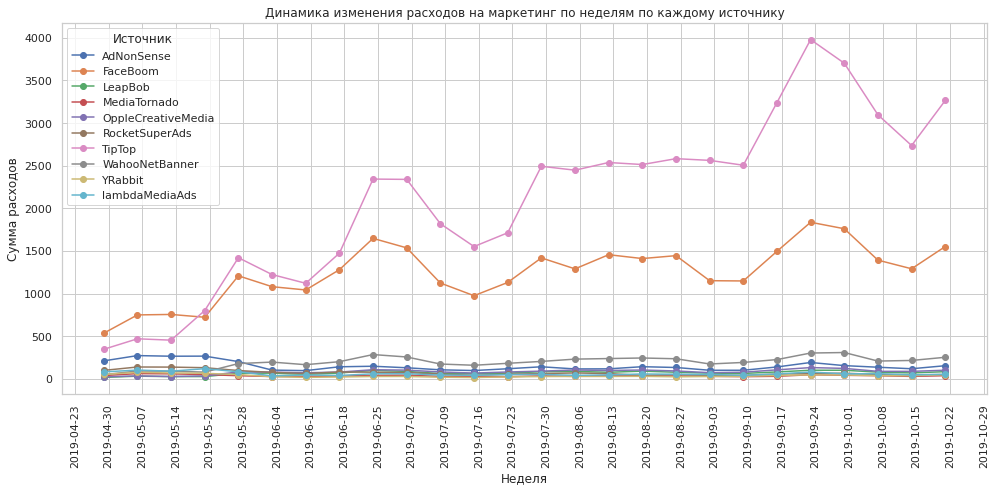

In [65]:
# Группирую данные по неделям и каналам
weekly_costs = costs.groupby(['week', 'channel'])['costs'].sum().reset_index()

# построение графика
plt.figure(figsize=(14, 7))

# построение графика для каждого канала
for channel in weekly_costs['channel'].unique():
    channel_data = weekly_costs[weekly_costs['channel'] == channel]
    plt.plot(channel_data['week'], channel_data['costs'], marker='o', label=channel)

# настройка графика
plt.title('Динамика изменения расходов на маркетинг по неделям по каждому источнику')
plt.xlabel('Неделя')
plt.ylabel('Сумма расходов')
plt.xticks(rotation=90)

# форматирование для отображения недель
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Отображаем каждую неделю
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Формат даты

plt.legend(title='Источник')
plt.grid(visible=True)
plt.tight_layout()

# Вывод графика
plt.show()


**По месяцам.**

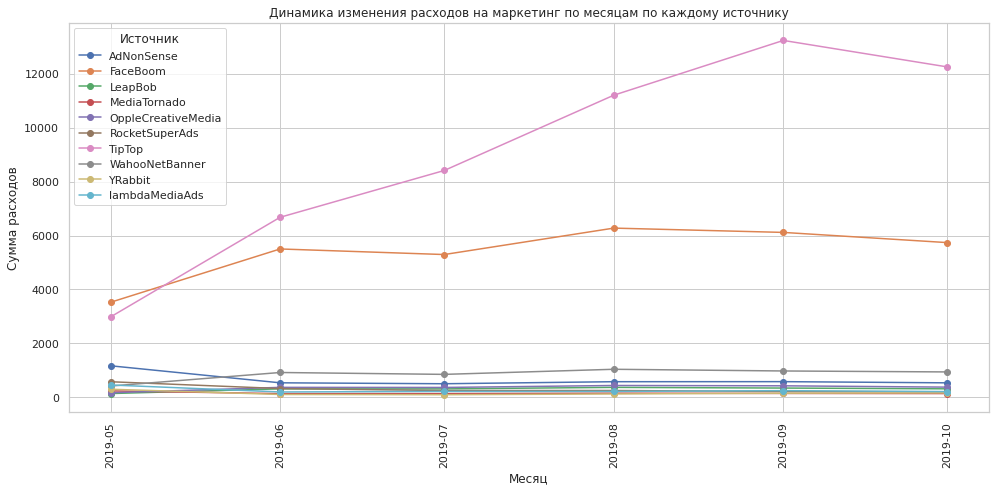

In [64]:
# Группирую данные по неделям и каналам
month_costs = costs.groupby(['month', 'channel'])['costs'].sum().reset_index()

# построение графика
plt.figure(figsize=(14, 7))

# построение графика для каждого канала
for channel in month_costs['channel'].unique():
    channel_data = month_costs[month_costs['channel'] == channel]
    plt.plot(channel_data['month'], channel_data['costs'], marker='o', label=channel)

# настройка графика
plt.title('Динамика изменения расходов на маркетинг по месяцам по каждому источнику')
plt.xlabel('Месяц')
plt.ylabel('Сумма расходов')
plt.xticks(rotation=90)
plt.legend(title='Источник')
plt.grid(visible=True)
plt.tight_layout()

# Вывод графика
plt.show()

**Вывод:**
- Как видно из графиков Динамки изменения во времени расходов на маркетинг, что для рекламных каналов TipTop и FaseBoom расходы за рассматриваемый переиод стабильно увеличиваются, а для остальных каналов остаются более постоянными - без скачков и падений.
- Резкое увеличение рекламного бюджнта для канала TipTop наблюдается c 14 мая 2019, а для FaseBoom с 21 мая 2019, далее для FaseBoom идет стабильное бюджетирование (в разрезе по месяцам), а для TipTop бюджетирование продолжает расти.
- Снжение бюджетирования для TipTop и FaseBoom наблюдается с сенября 2019.

###  Расчет САС в разбивке по рекламным каналам.

САС - средняя стоимость привлечения одного клиента.

In [46]:
# Рассчет среднего CAC на одного пользователя для всего проекта,
# используя профили пользователей, но без канала Organic,
# т.к. канал привлечения Organic приложению ничего не стоит.
cac_total = (profiles
              .query('channel != "organic"')[['user_id', 'acquisition_cost']]
              .drop_duplicates()
              .agg({'acquisition_cost': 'mean'})
             )

# вывод данных
display('Средний САС для всего проекта:', cac_total)

'Средний САС для всего проекта:'

acquisition_cost   1.127
dtype: float64

In [47]:
# расчет САС в разбивке по каналам привлечения
cac_channel = (
    profiles
    .groupby('channel', as_index=False)  # Группируем по каналу
    .agg(cac=('acquisition_cost', 'mean'))  # Рассчитываем среднюю стоимость привлечения
    .sort_values(by='cac', ascending=False) # Сортируем по стоимости привлечения
)

# вывод данных и переименование столбцов
display(cac_channel.rename(columns={'channel':'канал', 'acquisition_cost': 'cac'}))

,канал,cac
6,TipTop,2.799
1,FaceBoom,1.113
0,AdNonSense,1.008
9,lambdaMediaAds,0.725
7,WahooNetBanner,0.602
5,RocketSuperAds,0.412
4,OppleCreativeMedia,0.250
8,YRabbit,0.219
3,MediaTornado,0.219
2,LeapBob,0.210


**Вывод:**
- средний САС проекта составляет 1.127
- дороже всего обходятся пользователи, которых привлекли через каналы TipTop (2.799), FaceBoom (1.113) и AdNonSense (1.008) - это ТОП-3 каналов, где САС >1.

### Общие выводы по анализу расходов на маркетинг.
**В ходе проведенного анализа расходов на маркетинг, были выполнены шаги:**
1. Рассчитана общая сумма расходов на маркетинг за весь рассматриваемый период.
2. Расчитаны расходы на маркетинг в разбиыке по рекламным каналам.
3. Рассмотрина динамика изменения (по неделям и месяцам) во времени расходов на маркетинг.
4. Расчитана средняя стоимость привлечения одного клиента (САС) в целом по проекту и в разбивке по рекламным каналам.

**Итоги проведенного анализа:**
1. Общая сумма затрат на маркетинг составила 105 497 уе.
2. Наибольшее количество средств на маркетиг вкладывается в рекламные канылы TipTop (51,8%) и FaceBoom (30,7%).
3. Из графиков Динамки изменения во времени расходов на маркетинг видно, что для рекламных каналов TipTop и FaseBoom расходы за рассматриваемый переиод стабильно увеличиваются, а для остальных каналов остаются более постоянными - без скачков и падений.
4. Средний САС проекта - 1.127 уе (расчитан без канала Organic, т.к. канал привлечения Organic приложению ничего не стоит). ТОП-3 каналов, в которых дороже всего обходится привлечение пользователей: TipTop (2.799 уе), FaceBoom (1.113 уе) и AdNonSense (1.008 уе).

## Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**Перед началом оценки окупаемости рекламы исключу из данных пользователей привлеченных с канала organic, т.к. компании такие пользователи ничего не стоят.**

In [48]:
# исключаю органических пользователей
profiles = profiles.query('channel != "organic"')

# проверка данных
profiles['channel'].unique().tolist()

['FaceBoom',
 'AdNonSense',
 'YRabbit',
 'MediaTornado',
 'RocketSuperAds',
 'LeapBob',
 'TipTop',
 'WahooNetBanner',
 'OppleCreativeMedia',
 'lambdaMediaAds']

In [49]:
# Задам момент и горизон анализа
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа
analysis_horizon = 14  # горизонт анализа в днях

### Оценка окупаемости без разбивки.

**LTV, ROI, CAC**

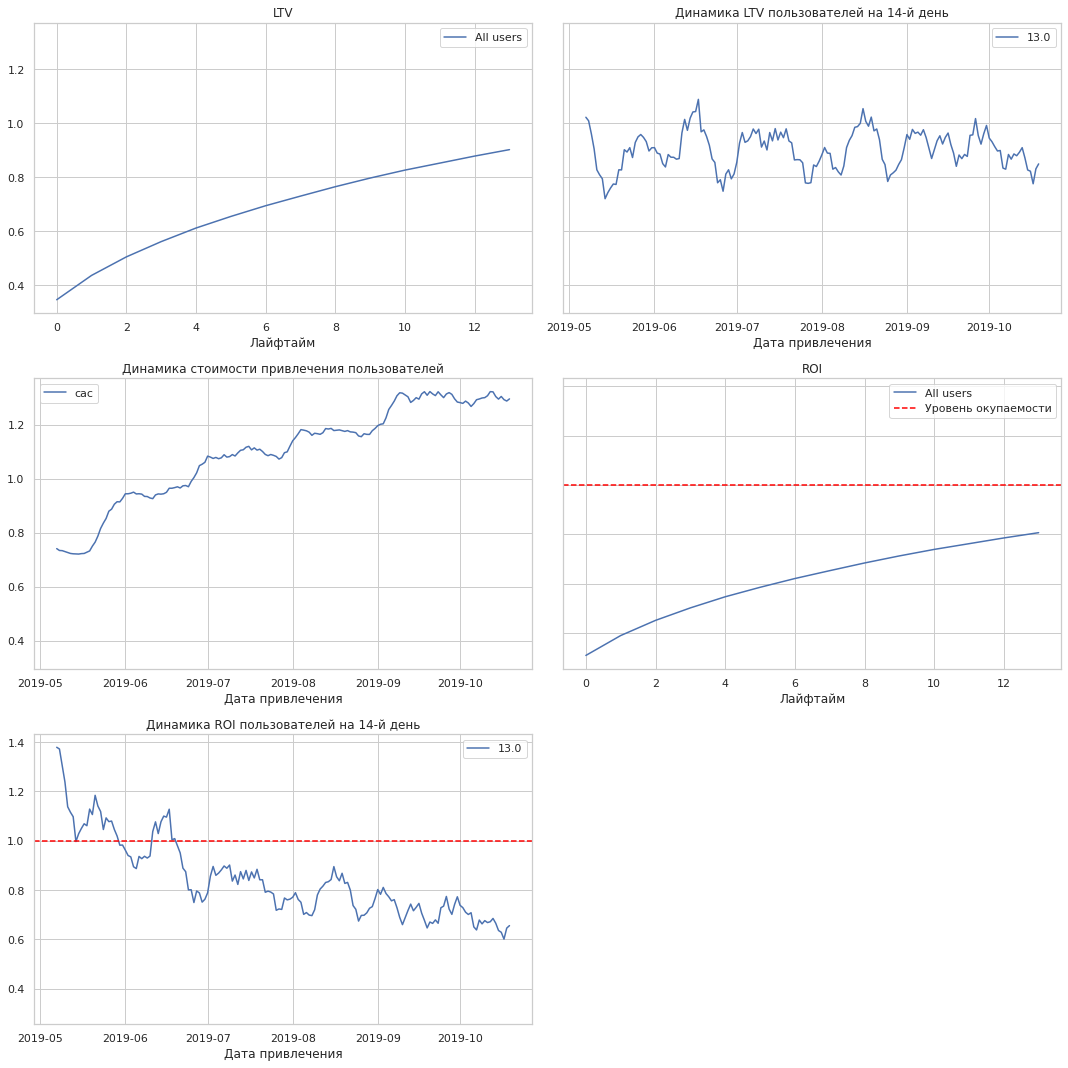

In [50]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

1. Реклама не окупается. К концу второй недели ROI — около 80%.
2. CAC нестабилен. Наблюдается рост рекламного бюджета во времени.
3. На LTV влияет сезонный фактор, но в целом, этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
4. ROI пользователей падает. До июля показатель был выше уровня окупаемости, но к концу анализируемого времени наблюдений упал до 0.6.

### Окупаемость рекламы с разбивкой по устройствам.

In [51]:
dimensions = ['device'] # определние устройства пользователя

**LTV, ROI, CAC**

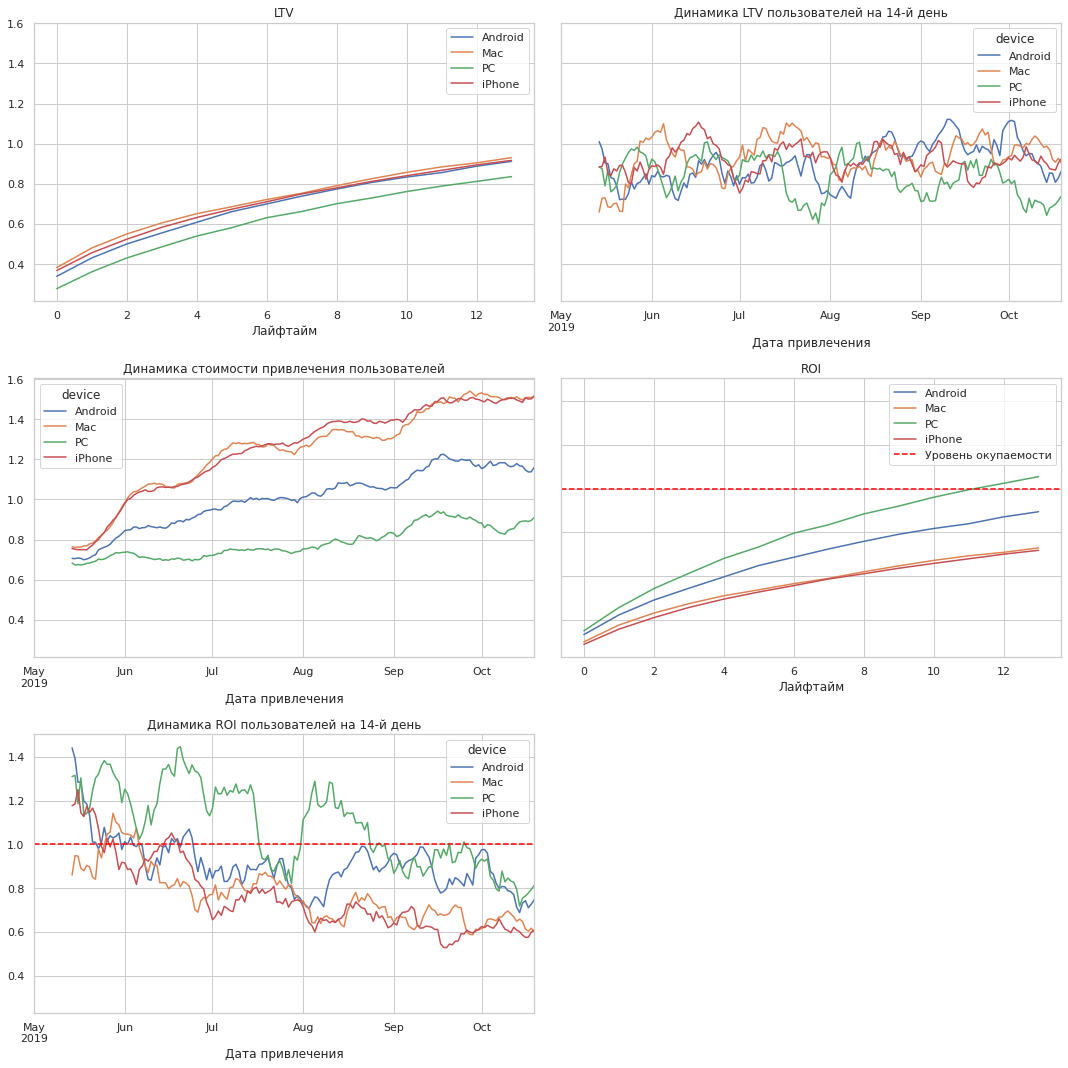

In [52]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

1. Пользователи всех устройств окупались до июня, далее окупались только пользователи РС (с провалом в конце июля), но с конца августа и они перестали окупаться. 
2. LTV пользователей разных устройств зависит от сезонности, но стабилен.
3. Стоимость привлечения пользователей всех устройств растет. Стоимость привлечения пользователей PC самая низкая, но пользователи РС окупаются, в отличие от остальных, хотя за рассматриваемый период и эти пользователи с конца августа перестают окупаться. Самый высокий САС у пользователей Мас и iPhone, но эти пользователи не окупаются и наблюдается самый низкий уровень ROI. 

**Конверсия пользователей.**

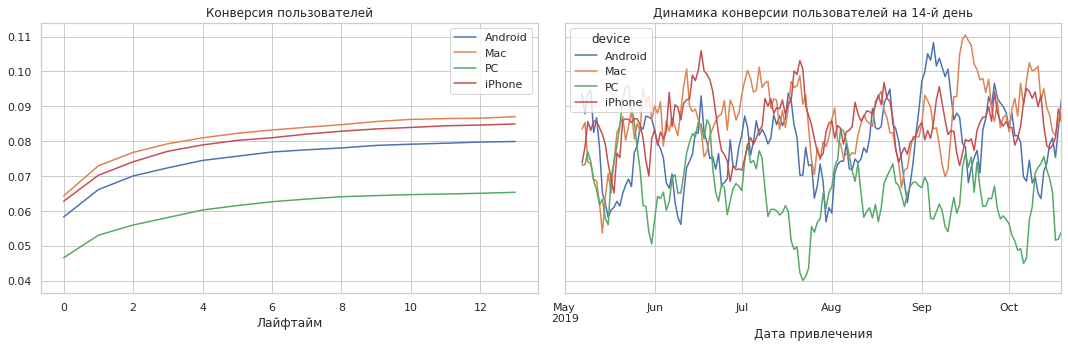

In [53]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

В целом пользователи всех устройств хорошо конверсируются. В лидирах пользователи с устройств типа Мас, в аутсайдерах пользователи с устройств РС.

**Удержание пользователей.**

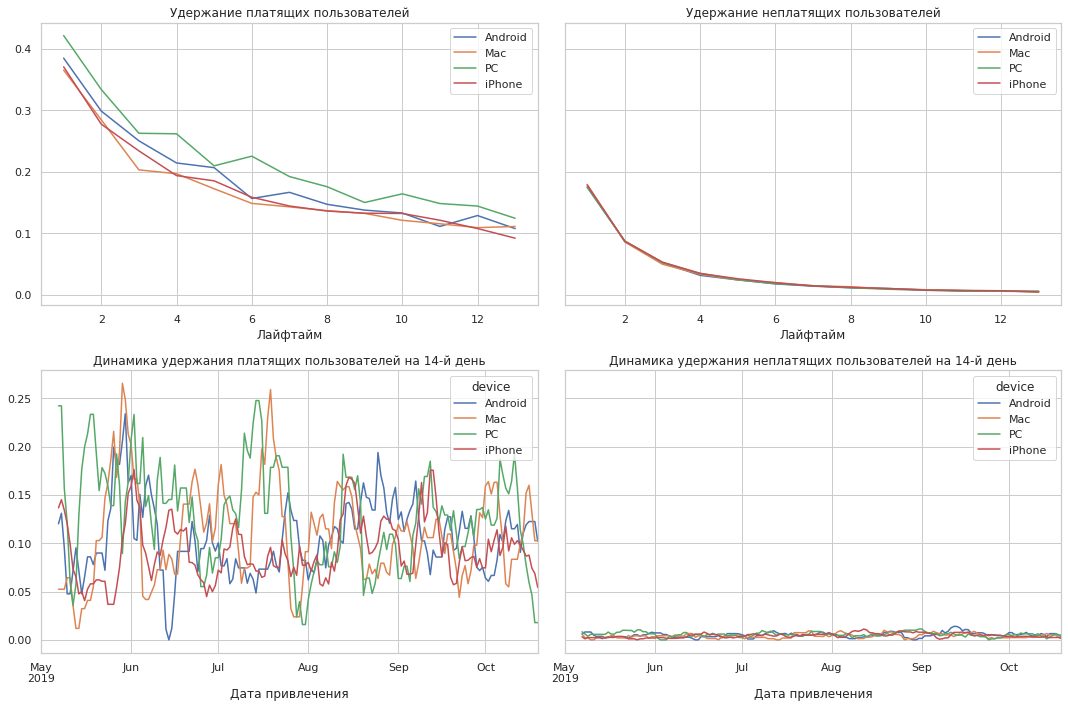

In [54]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

В целом пользователи всех устройст удерживаютя примерно на одном уровне, резких различий не наблюдается. Немного лучше удерживаются платящие пользователи с утройств РС.

#### Выводы по оценки окупаемости в разбивке по устройствам.
1. Пользователи всех устройств окупались до июня, далее окупались только пользователи РС (с провалом в конце июля), но с конца августа и они перестали окупаться. 
2. LTV пользователей разных устройств зависит от сезонности, но стабилен.
3. Стоимость привлечения пользователей всех устройств растет. Стоимость привлечения пользователей PC самая низкая, но пользователи РС окупаются, в отличие от остальных. Самый высокий САС у пользователей Мас и iPhone, но эти пользователи не окупаются и наблюдается самый низкий уровень ROI.
4. Пользователи всех устройств хорошо конверсируются. В лидирах пользователи с устройств типа Мас, в аутсайдерах пользователи с устройств РС.
5. Пользователи всех устройст удерживаютя примерно на одном уровне, резких различий не наблюдается. Немного лучше удерживаются платящие пользователи с утройств РС.

### Окупаемость рекламы с разбивкой по странам.

In [55]:
dimensions = ['region'] # определние страны пользователя

**LTV, ROI, CAC**

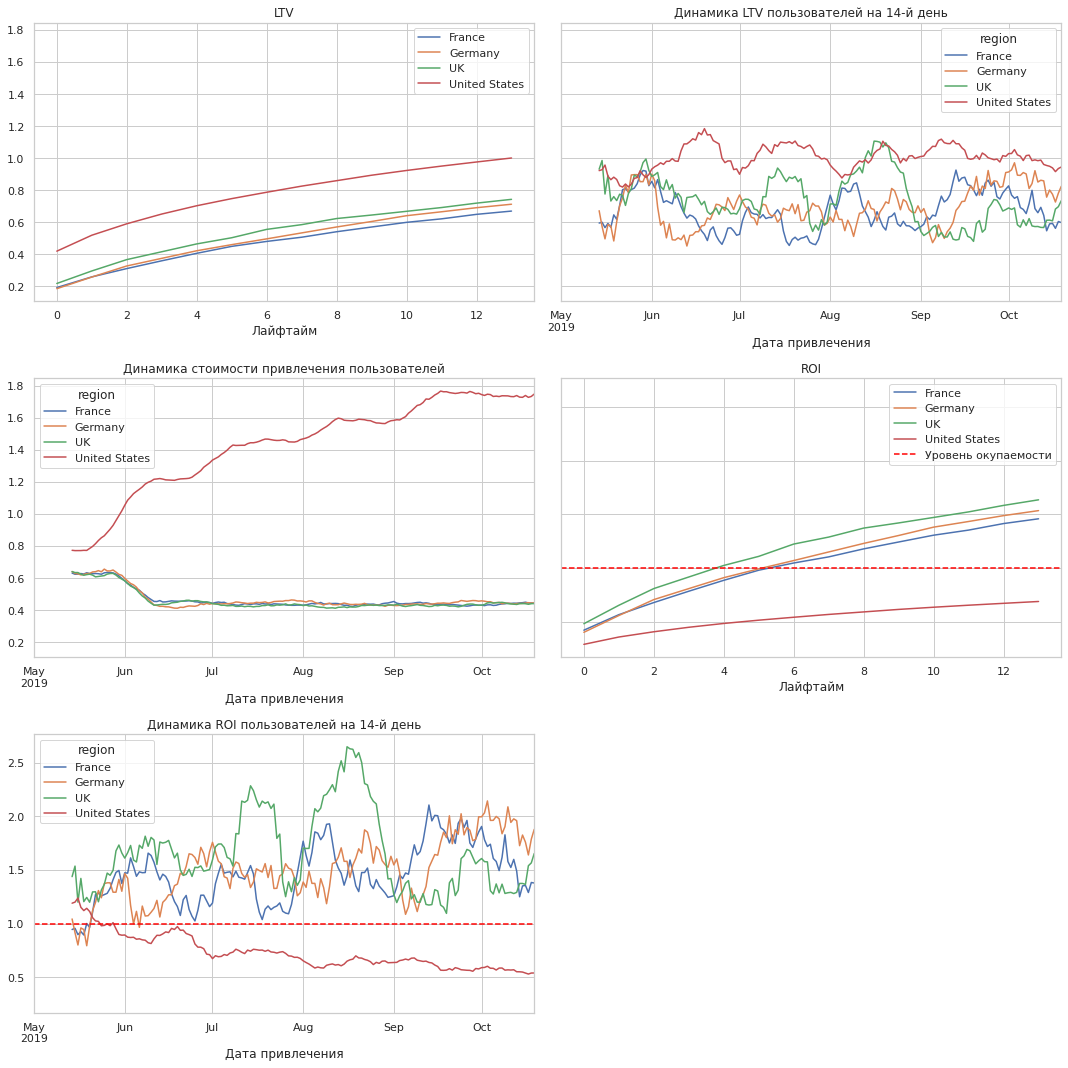

In [56]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

1. LTV подвержен сезонности, но стабилен. LTV пользователей из США самый высоки, у европейских пользователей этот показатель ниже, чем в США и примерно на одном уровне.
2. Стоимость привлечения пользователей самая высокая для США и наблюдается стабильный рост этого показателя. Для европейских пользователей САС значительно ниже, с конца мая до середины июня наблюдается снижение САС и далее за весь рассматриваемый период он стабилен и примерно на одном уровне.
3. ROI (окупаемость рекламы) же для европейских пользователей самый высокий и примерно с 5-7 дня наблюдается, что этот показатель переходит выше уровня окупаемости. Так же видно, что за весь рассматриваемый период ROI европейских пользователей не опускается ниже уровня окупаемости, а для пользователей с Великобритании этот показатель в середине июля и августа был самым высоким. Для пользователей из США ROI значительно ниже, чем у европейских пользователей и затраты на рекламу не окупаются. С конца мая наблюдается стабильный спад этого показателя.

**Конверсия пользователей.**

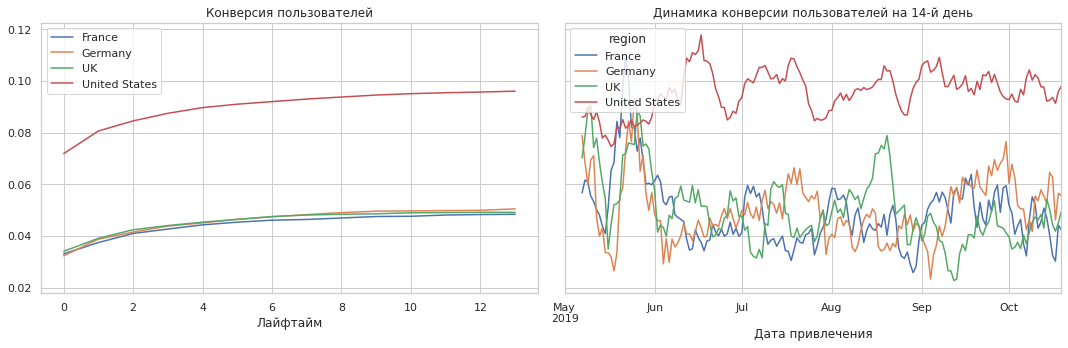

In [57]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

Значительно лучше конверсируются пользователи США, для европейских пользователей уровень конверсии примерно одинаков.

**Удержание пользователей.**

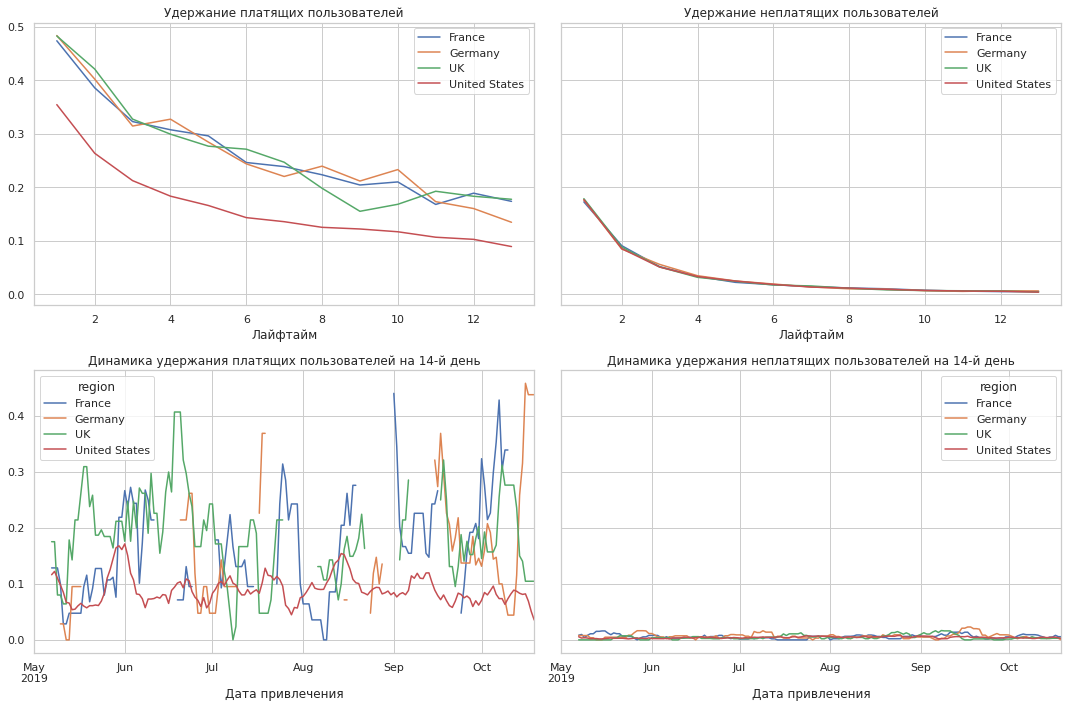

In [58]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

В явных аутсайдерах по уровню удержания платящих пользователей - это США, у европейских пользователей этот показатель примерно на одном уровне, с 9 по 11 день жизни наблюдается рост удержания пользователей с Германии, а на 10 день - снижение удержания пользователей с Великобритании. Уровень удержания для неплатящих пользователей стабилен и примерно на одном уровне для всех стран.

#### Выводы по оценки окупаемости с разбивкой по странам:
1. LTV подвержен сезонности, но стабилен. LTV пользователей из США самый высоки, у европейских пользователей этот показатель ниже, чем в США и примерно на одном уровне.
2. Стоимость привлечения пользователей самая высокая для США и наблюдается стабильный рост этого показателя. Для европейских пользователей САС значительно ниже, с конца мая до середины июня наблюдается снижение САС и далее за весь рассматриваемый период он стабилен и примерно на одном уровне.
3. ROI (окупаемость рекламы) же для европейских пользователей самый высокий и примерно с 5-7 дня наблюдается, что этот показатель переходит выше уровня окупаемости. Так же видно, что за весь рассматриваемый период ROI европейских пользователей не опускается ниже уровня окупаемости, а для пользователей с Великобритании этот показатель в середине июля и августа был самым высоким. Для пользователей из США ROI значительно ниже, чем у европейских пользователей и затраты на рекламу не окупаются. С конца мая наблюдается стабильный спад этого показателя.
4. Значительно лучше конверсируются пользователи США, для европейских пользователей уровень конверсии примерно одинаков.
5. В явных аутсайдерах по уровню удержания платящих пользователей - это США, у европейских пользователей этот показатель примерно на одном уровне, с 9 по 11 день жизни наблюдается рост удержания пользователей с Германии, а на 10 день - снижение удержания пользователей с Великобритании. Уровень удержания для неплатящих пользователей стабилен и примерно на одном уровне для всех стран.

### Окупаемость рекламы с разбивкой по каналам привлечения.

In [59]:
dimensions = ['channel'] # определние страны пользователя

**LTV, ROI, CAC**

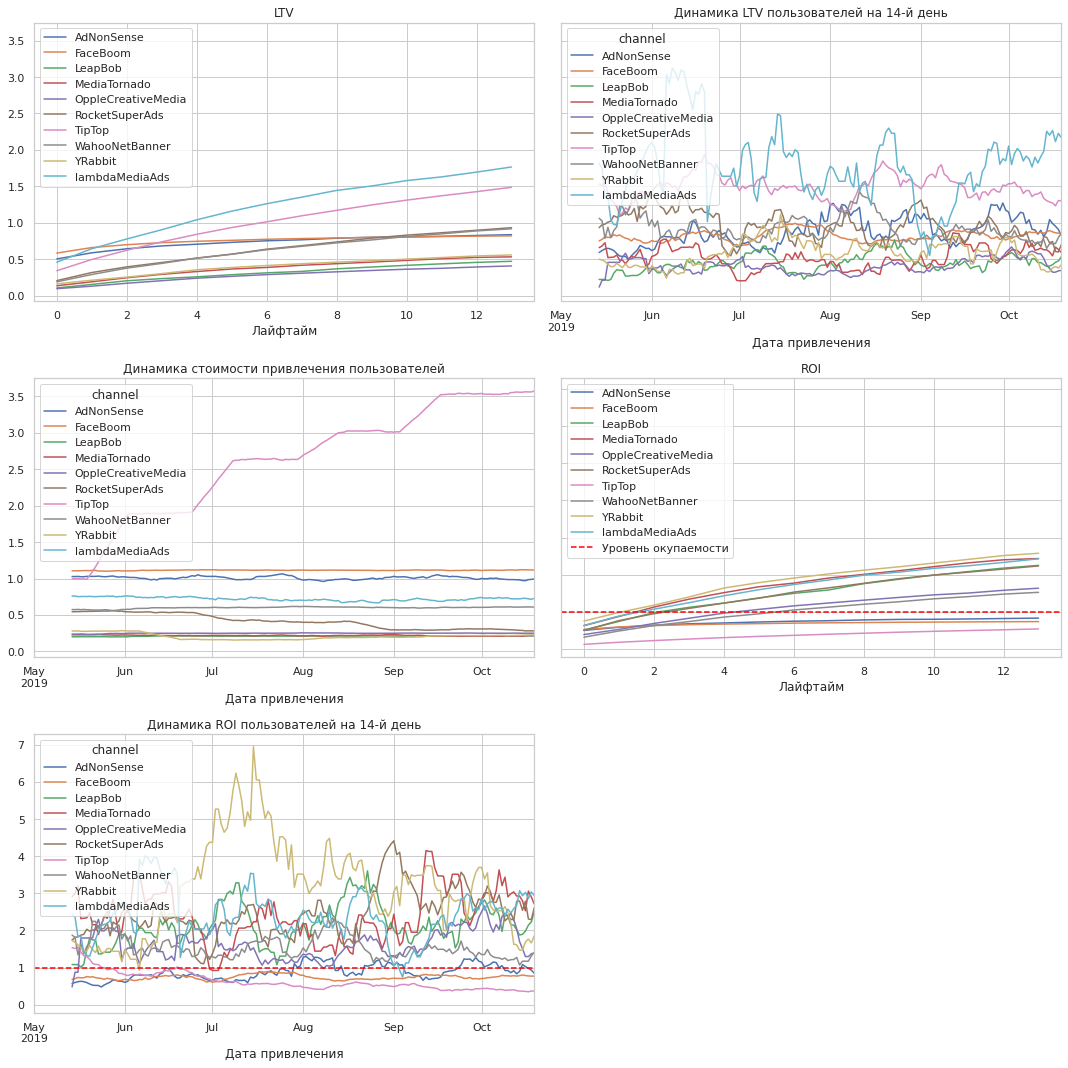

In [60]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
) 

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

Как видно из графиков:
1. Самый высокий LTV для каналов TipTop и YRabbit. В целом же наблюдается зависимость от сезона для этого показателя.
2. Большой рост стоимости привлечения пользователей из рекламного канала TipTop, но маркетинговые вложения в этот канал не окупаются (они стабильно не окупаются на протяжение всего анализируемого периода), так же не окупаются пользователи с каналов AdNonSense, FaceBoom. Для пользователей с остальных каналов показатель САС достаточно стабильный за весь рассматриваемый период, а окупаемость маркетинга происходит примерно со 2- 4 дня жизни.
3. Хорошо показала себя рекламная сеть YRabbit в июле - ROI пользователей на 14 день был высок.

**Конверсия пользователей.**

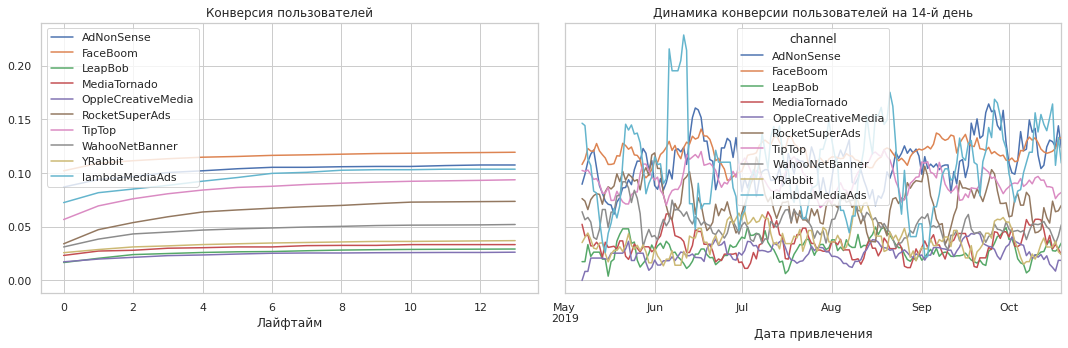

In [61]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

ТОП-4 каналов рекламы, пользователи из которых лучше всего конверсируются - FaceBoom,  AdNonSense, lambdaMediaAds и TipTop.

**Удержание пользователей.**

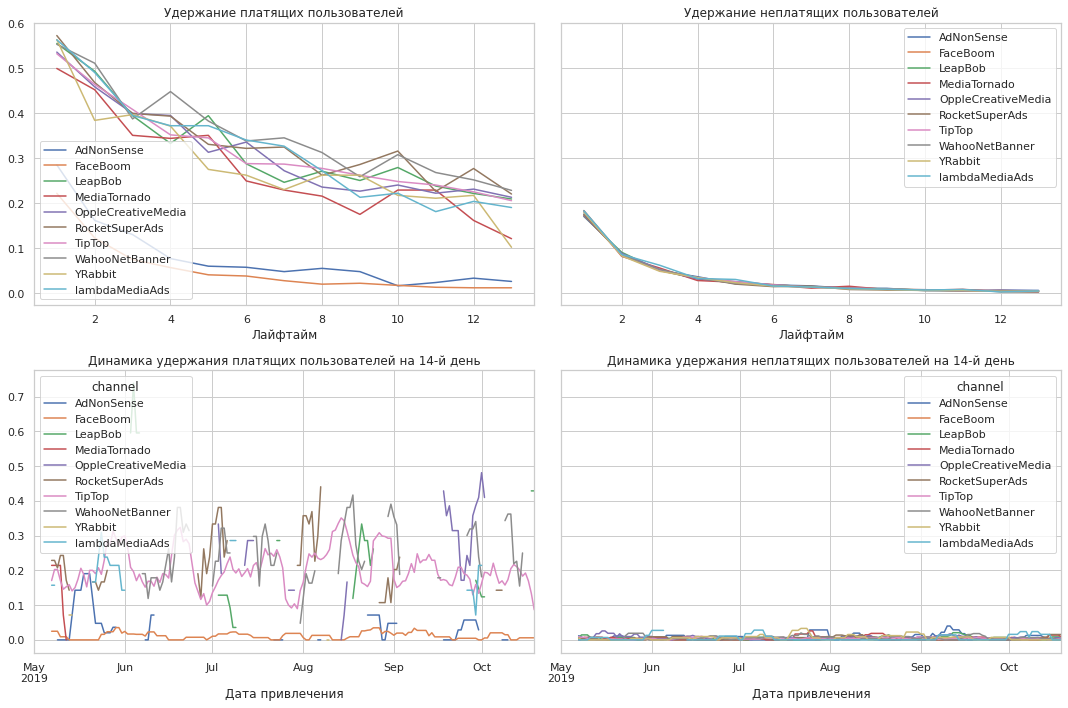

In [62]:
# смотрим удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

Хуже всего уровень удержания платящих пользователей для рекламных каналов FaceBoom, AdNonSense - этот уровень значительно ниже, чем у других каналов. Для канала FaceBoom уровень удержания стабильно низкий за весь рассматриваемый период. 

Ранее выяснила, что средний САС проекта в разбивке по каналам - 1.127 уе (расчитан без канала Organic), так же определила ТОП-3 каналов, в которых дороже всего обходится привлечение пользователей:
- TipTop (2.799 уе), 
- FaceBoom (1.113 уе),
- AdNonSense (1.008 уе).

Для полноты картины определю к каким странам относятся эти рекламные каналы и количество уникальных пользователей,  и добавлю в этот список канал lambdaMediaAds (его САС тоже высок).

In [63]:
# список нужных каналов
#target_channels = ['TipTop', 'FaceBoom', 'AdNonSense', 'lambdaMediaAds']

# Фильтрация данных по выбранным каналам
#filtered_profiles = profiles[profiles['channel'].isin(target_channels)]

# Группирую данные по каналу и региону и считаю количество пользователей
channel_region_counts = profiles.groupby(['region', 'channel']).agg(user_count=('user_id', 'nunique')).reset_index()

# Вывод результатов
display("Количество пользователей по каналам и регионам:")
display(channel_region_counts)

'Количество пользователей по каналам и регионам:'

,region,channel,user_count
0,France,AdNonSense,1366
1,France,LeapBob,2988
2,France,OppleCreativeMedia,2991
3,France,WahooNetBanner,2971
4,France,lambdaMediaAds,742
5,Germany,AdNonSense,1219
6,Germany,LeapBob,2519
7,Germany,OppleCreativeMedia,2562
8,Germany,WahooNetBanner,2579
9,Germany,lambdaMediaAds,649


Как видно, что рекламные каналы AdNonSense и LambdaMediaAds - это каналы с евроейских стран, а TipTop и FaceBoom - это США.

#### Выводы по оценки окупаемости с разбивкой по каналам привлечения:

1. Самый высокий LTV для каналов TipTop и YRabbit. В целом же наблюдается зависимость от сезона для этого показателя.
2. Большой рост стоимости привлечения пользователей из рекламного канала TipTop, но маркетинговые вложения в этот канал не окупаются, так же не окупаются пользователи с каналов AdNonSense, FaceBoom. Для пользователей с остальных каналов показатель САС достаточно стабильный за весь рассматриваемый период, а окупаемость маркетинга происходит примерно со 2- 4 дня жизни.
3. Хорошо показала себя рекламная сеть YRabbit в июле - ROI пользователей на 14 день был высок.
4. ТОП-4 каналов рекламы, пользователи из которых лучше всего конверсируются - FaceBoom,  AdNonSense, lambdaMediaAds и TipTop.
5. Хуже всего уровень удержания платящих пользователей для рекламных каналов FaceBoom, AdNonSense - этот уровень значительно ниже, чем у других каналов. Для канала FaceBoom уровень удержания стабильно низкий за весь рассматриваемый период.
6. Рекламные каналы AdNonSense и LambdaMediaAds - это каналы с евроейских стран, а TipTop и FaceBoom - это США.

### Общий вывод по проведенной оценки окупаемости рекламы.

*В ходе проведенного анализа можно ответить на поставленные вначале вопросы:*
1. Окупается ли реклама, направленная на привлечение пользователей в целом?
2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
3. Чем могут быть вызваны проблемы окупаемости?


1. В общем по всему проекту реклама не окупается (уровень ROI примерно 80%), а с середины июня наблюдается постоянное падение ROI.
2. В целом низкая окупаемость вызвана низкой окупаемостью рекламы в США, как основной страны присутствия. Пользователи из США конверсируются лучше, но есть проблемы с удержанием платящих пользователей. Один из самых проблемных каналов - FaceBoom: не окупается, имея второе место по сумме затрат на рекламу, низкое удержание платящих пользователей; так же можно отметить TipTop - неоправданно высокий рост САС, а окупаться перестал уже через месяц. По устройствам в аутсайдерах конверсии пользователи PC, но при этом они неплохо удерживаются.
3. Проблемы окупаемости могут быть вызваны ненормированным распределением средств на рекламу (в какой-то источник вложено больше средств, чем в остальные), также возможно, что горизонт анализа недостаточен для того, чтобы пользователи окупились.

*Промежуточные рекомендации для рекламного отдела.*
- Стоит направить внимание на владельцев Mac и iPhone - стоимость их привлечения высока (и растет от месяца к месяцу), а окупаемоcть страдает. 
- Для пользователей из США в целом реклама не окупается за горисонт анализа в 14 дней, а основная аудитория - это пользователи из США. Окупаются за 14 дней только пользователи из Европы, возможно, стоит попробовать закупить больше трафика, целясь на эту аудиторию.
- Виден большой рост стоимости привлечения пользователей из рекламного канала TipTop (США), которая не окупается. Возможно, стоит уменьшить бюджет, выделяемый на эту сеть и перенаправить его на более эффективный канал.


## Выводы и рекомендации.

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Предполагаемые причины неэффективности привлечения пользователей:**

1.	*Высокая стоимость привлечения (CAC).*
 Каналы TipTop и FaceBoom показали самый высокий CAC, но не смогли обеспечить окупаемость вложений. Несмотря на значительные инвестиции, особенно в TipTop, эти вложения не оправдали себя.
2.	*Снижение окупаемости рекламных затрат (ROI).*
В начале периода исследования ROI был выше уровня окупаемости, но к октябрю значение снизилось до 0.6. Это указывает на ухудшение рентабельности, особенно среди пользователей из США, для которых затраты на рекламу существенно выше, чем у европейских пользователей.
3.	*Спад показателей удержания.*
Уровень удержания платящих пользователей снижается со временем, особенно для пользователей с каналов FaceBoom и AdNonSense, что ограничивает долгосрочную монетизацию.
4.	*Низкая окупаемость по устройствам.*
Пользователи iPhone и Mac имеют высокий CAC и низкий ROI. В отличие от пользователей PC, которые показывают лучший уровень окупаемости, пользователи на iPhone и Mac не окупаются, несмотря на высокую конверсию.
5.	*Концентрация на американском рынке.*
Затраты на привлечение пользователей из США слишком высоки, а уровень удержания и окупаемость ниже, чем у европейских пользователей, что снижает общую эффективность маркетинговых расходов.

**Рекомендации для отдела маркетинга**

1.	*Оптимизация рекламных каналов с высоким CAC.*
- Сократить расходы на TipTop и FaceBoom, так как эти каналы не обеспечивают окупаемость.
- Рассмотреть возможность перераспределения бюджета на каналы с более низким CAC, такие как YRabbit и lambdaMediaAds, которые демонстрируют лучшую конверсию и окупаемость.
2.	*Фокус на удержании платящих пользователей.*
Разработать стратегию удержания для пользователей, привлеченных через каналы FaceBoom и AdNonSense, так как уровень удержания для этих каналов значительно ниже, чем у других. Это может включать программы лояльности или таргетированные предложения для повышения LTV.
3.	*Усиление маркетинговой стратегии для европейских пользователей.*
Пользователи из европейских стран показывают высокий ROI и стабильный CAC. Увеличение вложений в привлечение европейских пользователей может принести больший доход при более низких затратах.
4.	*Корректировка маркетинговой стратегии для устройств iPhone и Mac.*
- Пересмотреть подход к привлечению пользователей на этих устройствах, поскольку их высокая стоимость привлечения не окупается. 
- Возможно, стоит сосредоточиться на пользователях PC, которые демонстрируют лучший уровень окупаемости и стабильное удержание.
5.	*Мониторинг и адаптация маркетинговых бюджетов по сезонным показателям.*
LTV подвержен сезонным колебаниям. Поддержка оптимального уровня затрат на рекламу в периоды с высоким ROI может повысить общую эффективность кампаний.